# Introduction & look up information

*December 22, 2020*

This notebook gives some simple examples on how to start working with `iniabu`. By the end of this notebook you should know how to load `iniabu`, how to access and load elements and isotopes, and how to look up general information about them.

First we need to load the module. We do this by using the default database using number abundances into `ini`. If `iniabu` is not installed in your python environment (e.g., if you just cloned the GitHub repository) you can make `iniabu` available by adding its home folder to the python path. Otherwise, comment out the first two line.

In [1]:
import sys
sys.path.insert(0, '../../')  # add iniabu to python path from this repo

%matplotlib inline
import matplotlib.pyplot as plt

from iniabu import ini  # load iniabu into ini

## Set the database you want to use
Let's first have a look at which database is loaded. This should be Lodders et al. (2009). 

In [2]:
ini.database

'lodders09'

Good, so that is all correct. We can switch over to another database and load that one, e.g., the Asplund et al. (2009) database. Loading a new database will print a message to state which database was just loaded and what units are currently being used.

In [3]:
ini.database = "asplund09"

iniabu loaded database: 'asplund09', current units: 'num_lin'


## Query an element

Let us query an element and look at its abundance. In the Asplund et al. (2009) database, which gives the abundances as present-day photospheric abundances, an element's abundance will be different compared to the database of Lodders et al. (2009), which gives the early Solar System abundances based on meteoritic measurements.

### Solar abundances

In [4]:
xe_asplund = ini.ele["Xe"]
print(f"Xenon abundance in {ini.database} database: {xe_asplund.abu_solar}")

Xenon abundance in asplund09 database: 5.370317963702532


**Important**: If you save an element into a variable, as done here setting the `xe_asplund` variable, it will be associated with the database loaded at that time!

Let's switch back to Lodders et al. (2009) and see how much xenon is here.

In [5]:
ini.database = "lodders09"
print(f"Xenon abundance in {ini.database} database: {ini.ele['Xe'].abu_solar}")

iniabu loaded database: 'lodders09', current units: 'num_lin'
Xenon abundance in lodders09 database: 5.457


Looks like the photospheric measurement shows a slightly lower measurement of Xe than the early Solar System measurements. This is not too surprising, having selected an element that is difficult to measure.

If you select an element for which the isotopic abundance is not in the selected database, `iniabu` will return a `numpy.nan`, i.e., not a number. For example, in Asplund et al. (2009), there is no abundance for uranium given.

In [6]:
ini.database = "asplund09"
print(f"Uranium abundance in {ini.database} database: {ini.ele['U'].abu_solar}")
# set the database back to Lodders
ini.database = "lodders09"
print(f"Uranium abundance in {ini.database} database: {ini.ele['U'].abu_solar}")

iniabu loaded database: 'asplund09', current units: 'num_lin'
Uranium abundance in asplund09 database: nan
iniabu loaded database: 'lodders09', current units: 'num_lin'
Uranium abundance in lodders09 database: 0.015036748009799998


The reason `nan` is returned is that if you are querying many elements or isotopes at once and continue doing math with the abundances, `nan` will simply propagate. So most of your results might still be fine, while some were not able to succeed with a query, and thus resulted in `nan`.

### Some other information that can be queried for elements

In [7]:
ele = ini.ele["Ne"]

# The name and mass of the loaded element
print(ele.name)
print(ele.mass)

Ne
20.131281205895796


In [8]:
# Isotopes, mass number, solar abundances, and relative abundances
print(ele.iso_a)
print(ele.iso_abu_solar)
print(ele.iso_abu_rel)

[20 21 22]
[3060000.    7330.  225000.]
[0.929431 0.002228 0.068341]


### Loading multiple elements at the same time

In [9]:
eles = ini.ele["H", "He"]
eles.abu_solar

array([2.5900503e+10, 2.5110300e+09])

## Querying isotopes

In the same way we can query elements, isotopes can be queried. The standard notation for an isotope name, e.g., <sup>20</sup>Ne is "Ne-20". To load one or multiple isotopes into the stack you can do the following:

In [10]:
iso = ini.iso["Ne-20"]
iso.abu_solar  # get solar abundance

3060000.0

In [11]:
isos = ini.iso[["Ne-20", "Ne-21", "Ne-22"]]
isos.abu_solar  # get solar abundance

array([3060000.,    7330.,  225000.])

In [12]:
isos.abu_rel  # get relative abundances

array([0.929431, 0.002228, 0.068341])

In [13]:
sum(isos.abu_rel)

1.0

The sum of the relative abundances of course sums to unity.

If you want to query all isotopes of a given element, e.g., of neon, you can also just give the isotope routine an element name. This will automatically select all available isotopes.

In [14]:
isos = ini.iso["Ne"]
print(isos.name)
print(isos.abu_rel)

['Ne-20', 'Ne-21', 'Ne-22']
[0.929431 0.002228 0.068341]


## Some usage cases


### Plot the solar abundances of all elements

To do this we use the fact that `iniabu` contains dictionaries for all the species, namely `ele_dict` and `iso_dict`. The keys of these dictionaries are the element and isotope names, respectively.

Text(0, 0.5, 'Solar abundance')

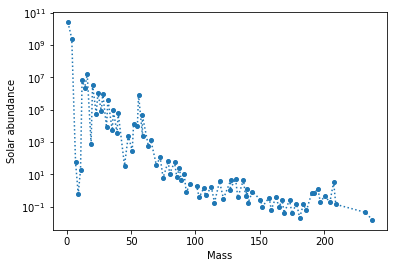

In [15]:
ele_names = ini.ele_dict.keys()  # all elements

# make the figure and axis
fig, ax = plt.subplots(1, 1)
eles = ini.ele[list(ele_names)]  # needs to be passed as a list, not dictionary keys!
ax.semilogy(eles.mass, eles.abu_solar, ':o', ms=4)
ax.set_xlabel('Mass')
ax.set_ylabel('Solar abundance')

### Plotting the relative abundances of noble gases
Let's say you'd like to make some bar plots with the abundances of noble gas isotopes as they were in the early solar system. We could accomplish that, using `matplotlib` to plot our results, as following:

Text(0, 0.5, 'Relative abundance (%)')

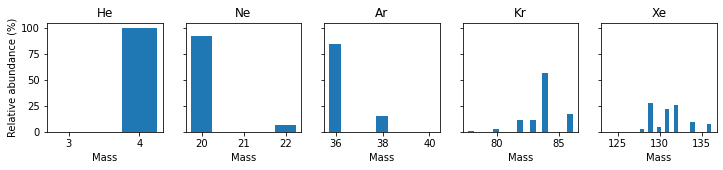

In [16]:
eles = ["He", "Ne", "Ar", "Kr", "Xe"]  # all elements we want to plot information for

# make the figure and axes
fig, ax = plt.subplots(1, len(eles), sharey=True, figsize=(12, 2))

# loop to make all the subplots
for it, ele in enumerate(eles):
    iso = ini.iso[ele]
    ax[it].bar(iso.mass, iso.abu_rel*100, width=0.5)
    ax[it].set_xlabel("Mass")
    ax[it].set_title(ele)

# y-label only for first    
ax[0].set_ylabel("Relative abundance (%)")

## Summary

The `iniabu` python package lets you interact with initial solar abundances. You can query elements and isotopes for various properties. Return values are generally given - if more than one - directly as `numpy` arrays that can be used further for math directly. Therefore, `numpy` is the only dependency that this package has.

More usage cases are discussed in with jupyter notebook examples. In addition you can have a look at the package documentation [here](https://iniabu.readthedocs.io) or by looking at the docstring of any function.

If you encounter issues, please post them to the [`iniabu` GitHub page](https://github.com/galactic-forensics/iniabu). There you can also find a discussion forum.